<a href="https://colab.research.google.com/github/seonae0223/Deep_Learning/blob/main/04_CIFAR10_Feature_Map_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 기존 모델 불러오기

In [ ]:
import torch
from torchvision import datasets, transforms

# 이미 훈련된 모델에서 Feature Map이 어떻게 훈련되었는가만 확인 할 예정이라 1개 BATCH만 활용
BATCH_SIZE = 1

save_model_path = "/content/drive/MyDrive/Colab Notebooks/DL/CNN/results/CNN_deep_CIFAR10.pt"
transform = transforms.ToTensor()

test_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/Colab Notebooks/DL/CNN/data', train=False, download=True, transform=transforms.ToTensor())
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [ ]:
from torch import nn

class CNN_deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(nn.Conv2d(3,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU(),
                                         nn.Conv2d(32,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv_block2 = nn.Sequential(nn.Conv2d(32,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv_block3 = nn.Sequential(nn.Conv2d(64,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)

        self.classifier = nn.Sequential(nn.Linear(128*4*4,512),
                                        nn.Linear(512,10))

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

load_model=torch.load(save_model_path, map_location=DEVICE)
print(load_model)

CNN_deep(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=

# 추론(inference)
- 테스트 데이터를 통과시켜, 테스트 이미지에 대한 Output Feature Map을 얻어냄

In [ ]:
# 추론 모드로 변경
load_model.eval()

with torch.no_grad():
    x_batch, y_batch = next(iter(test_DL))
    x_batch = x_batch.to(DEVICE)
    y_batch = y_batch.to(DEVICE)

    # 예측
    y_hat = load_model(x_batch)
    pred = y_hat.argmax(dim=1)

    # 각 블록 별 Output Feature Map 얻어내기
    feature_map1 = load_model.conv_block1(x_batch)
    feature_map2 = load_model.conv_block2(load_model.Maxpool1(feature_map1))
    feature_map3 = load_model.conv_block3(load_model.Maxpool2(feature_map2))

x_batch = x_batch.cpu()
feature_map1 = feature_map1.cpu()
feature_map2 = feature_map2.cpu()
feature_map3 = feature_map3.cpu()

# FeatureMap 확인

image size : torch.Size([3, 32, 32])


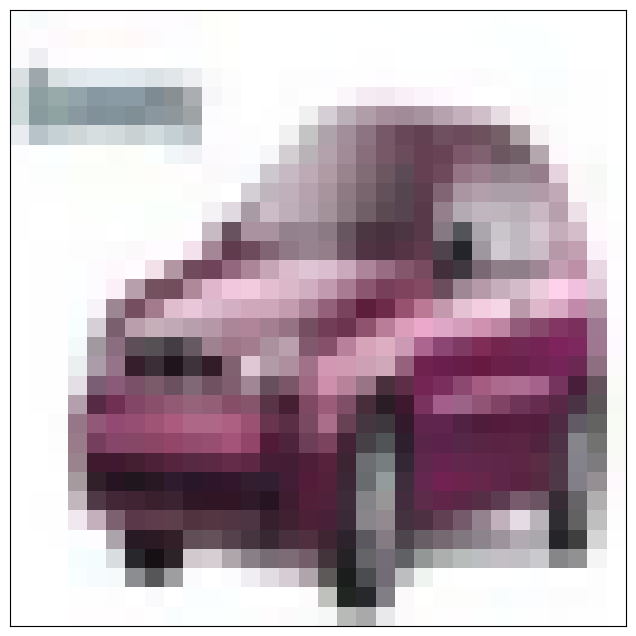

In [ ]:
import matplotlib.pyplot as plt

# 원본 이미지
print("image size : {}".format(x_batch[0,...].shape))
plt.figure(figsize=(8,8))
plt.xticks([]); plt.yticks([])
plt.imshow(x_batch[0,...].permute(1,2,0))
plt.show()

원본 이미지가 훈련된 모델을 통과 했을 때 각 합성곱 결과에 대한 Output Feature Map 확인

첫 번째 Feature Map 크기 : torch.Size([1, 32, 32, 32])


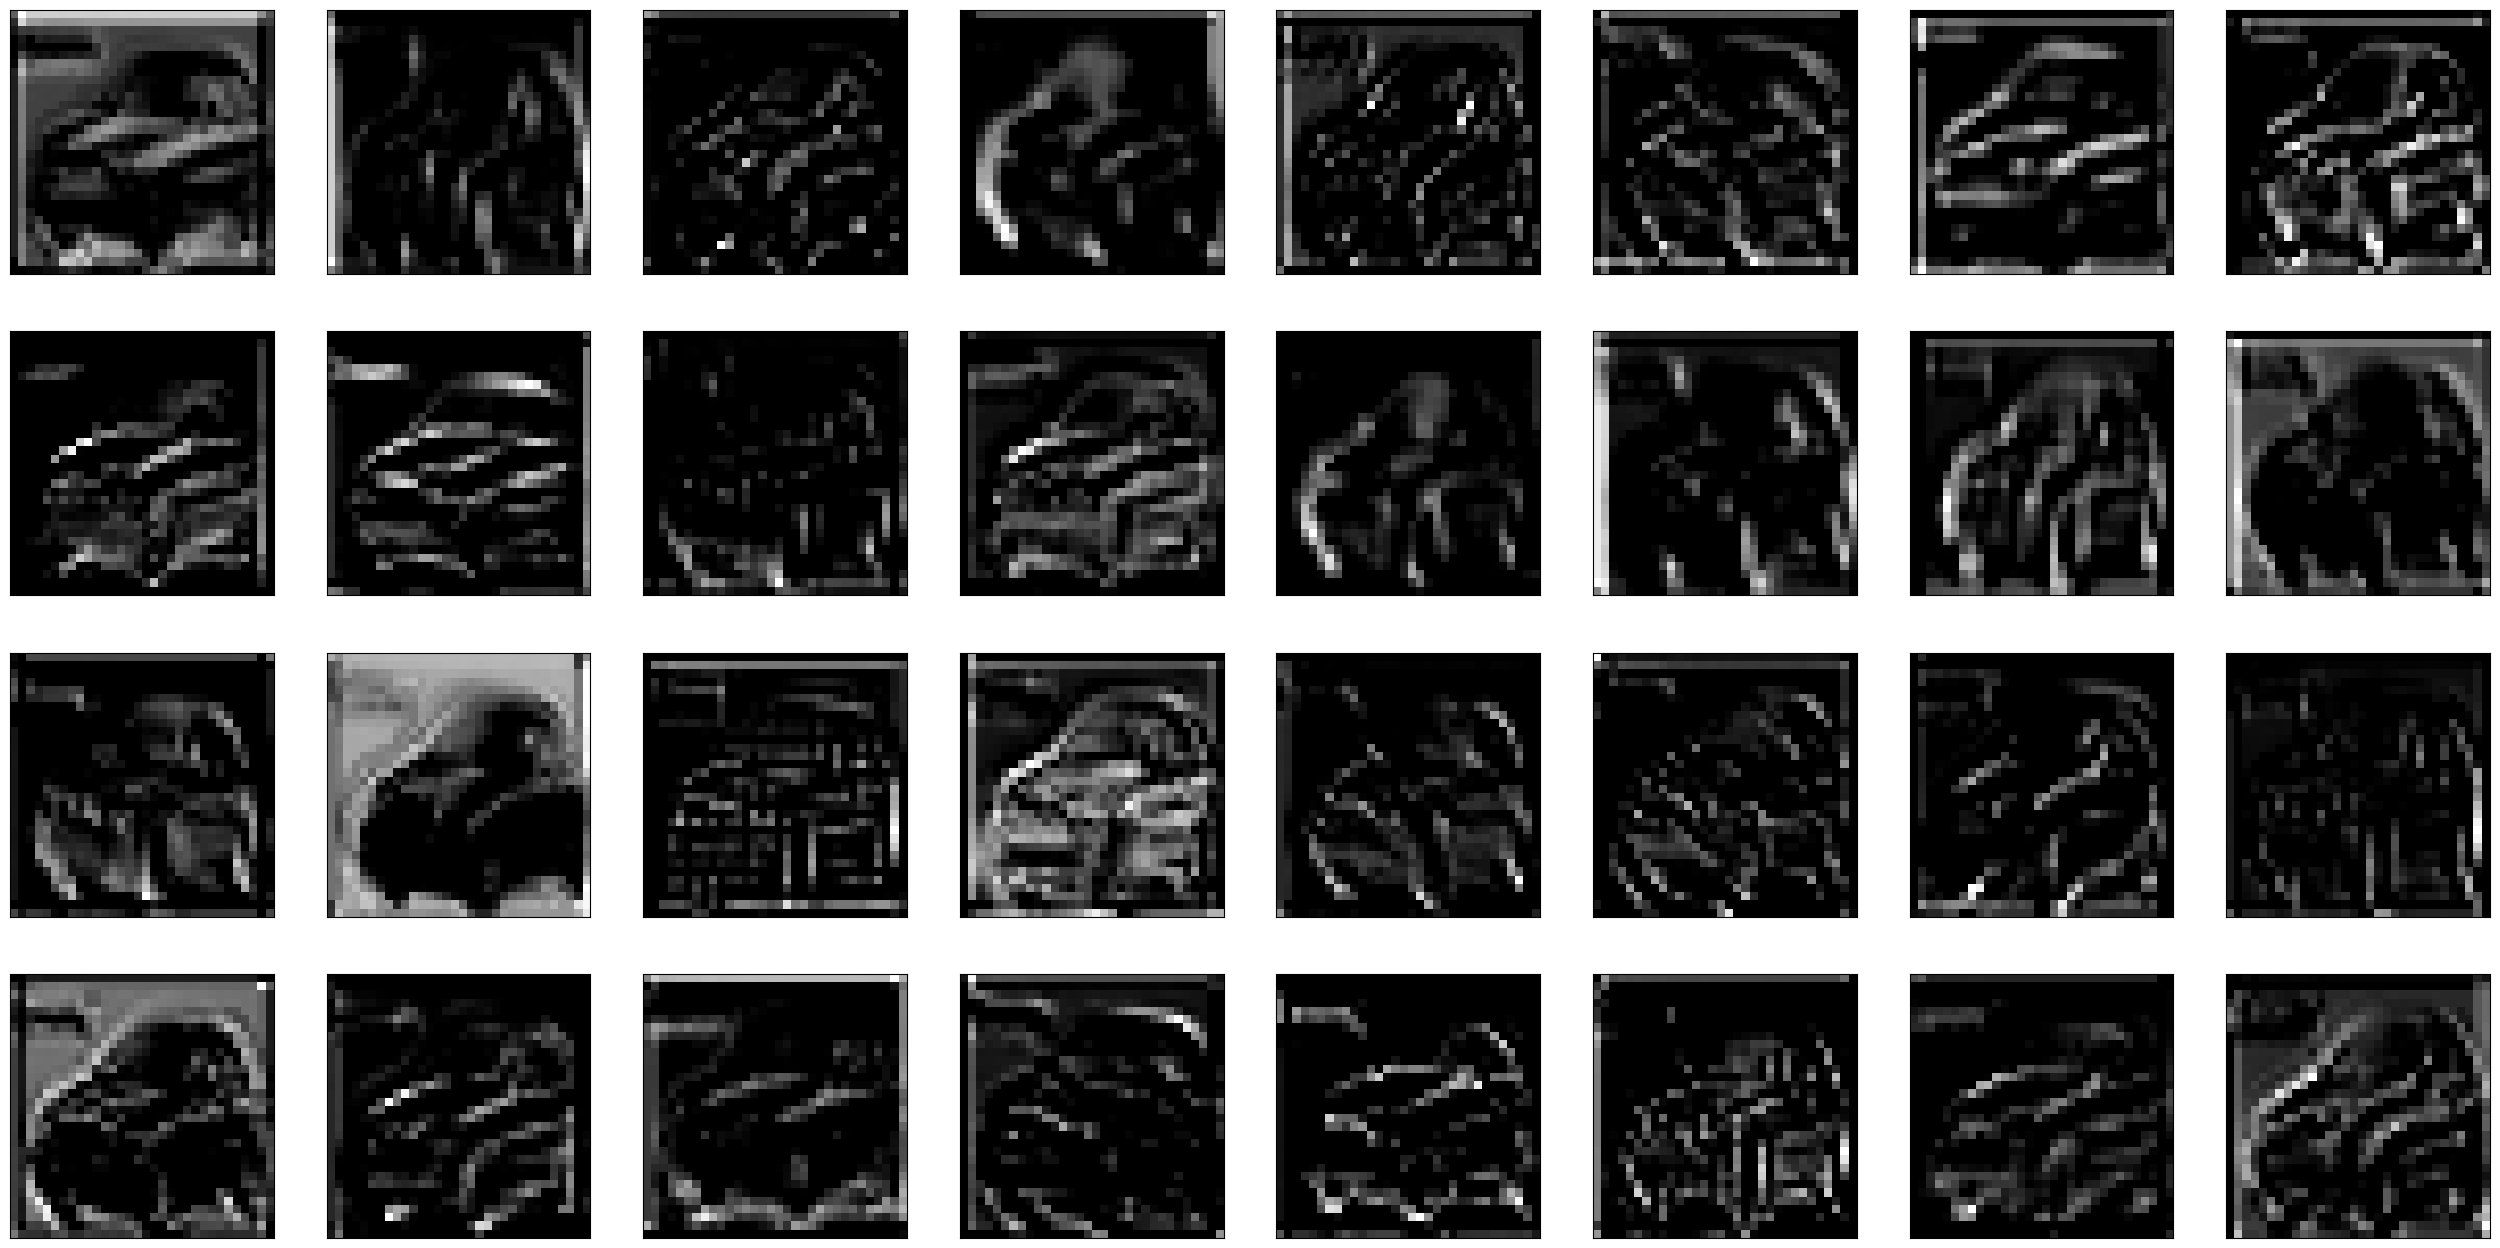

In [ ]:
print("첫 번째 Feature Map 크기 : {}".format(feature_map1.shape))
plt.figure(figsize=(32,16))
for idx in range(32):
    plt.subplot(4,8,idx+1, xticks=[], yticks=[])
    plt.imshow(feature_map1[0,idx,...], cmap="gray")
plt.show()

두 번째 Feature Map 크기 : torch.Size([1, 64, 16, 16])


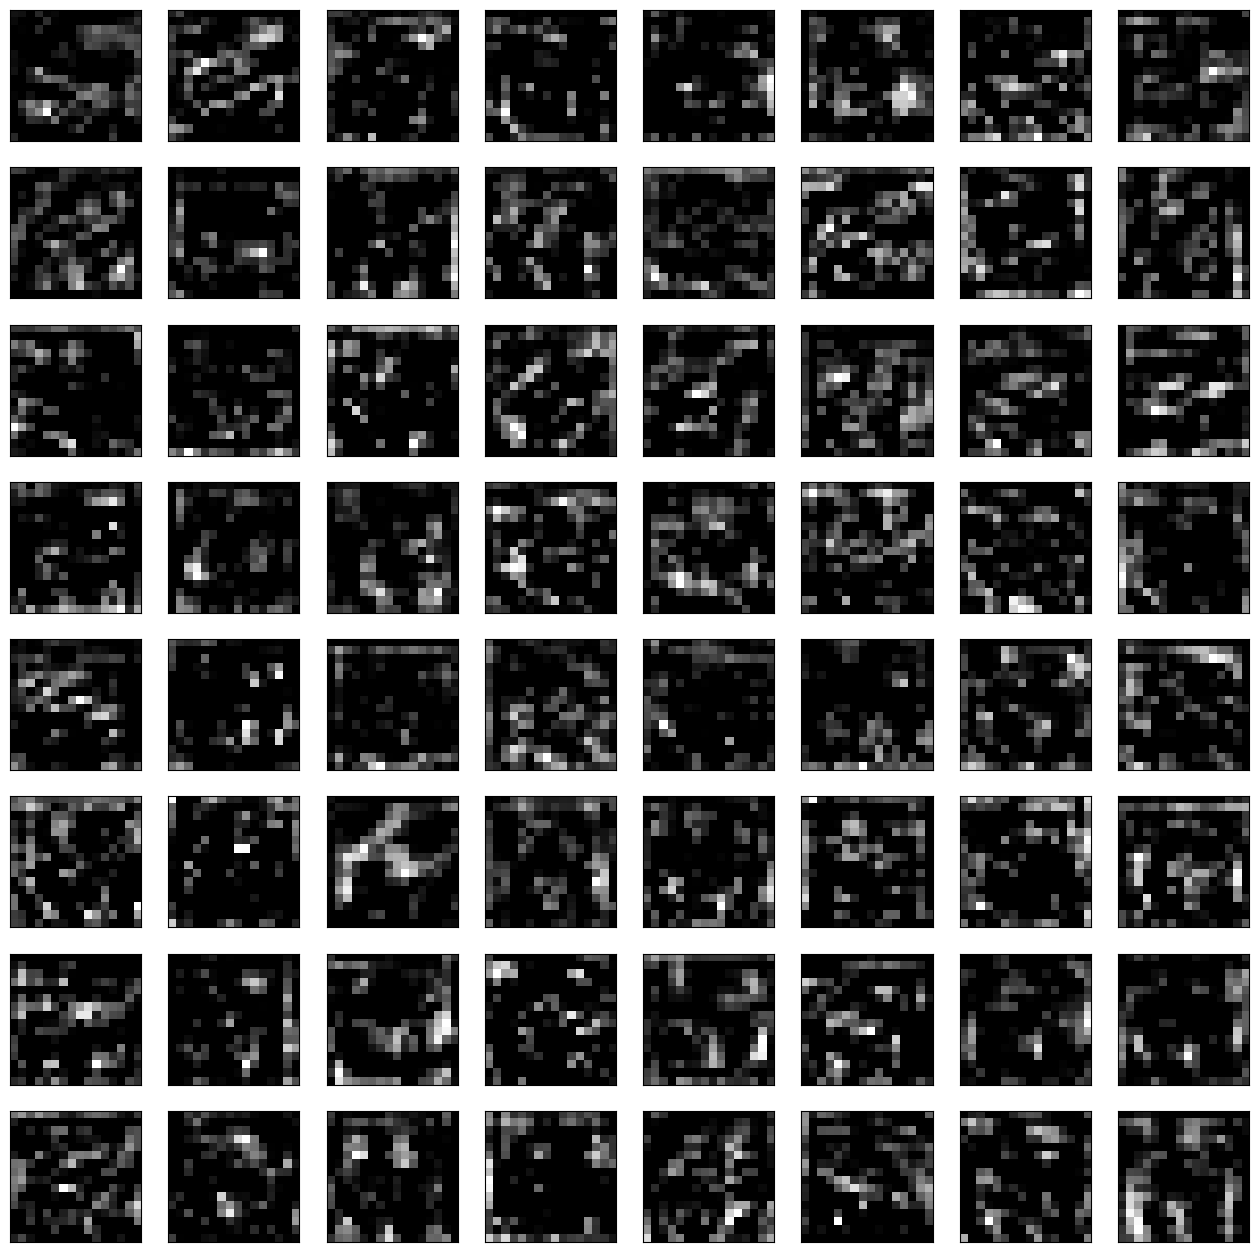

In [ ]:
print("두 번째 Feature Map 크기 : {}".format(feature_map2.shape))
plt.figure(figsize=(16,16))
for idx in range(feature_map2.shape[1]):
    plt.subplot(8,8,idx+1, xticks=[], yticks=[])
    plt.imshow(feature_map2[0,idx,...], cmap="gray")
plt.show()

세 번째 Feature Map 크기 : torch.Size([1, 128, 8, 8])


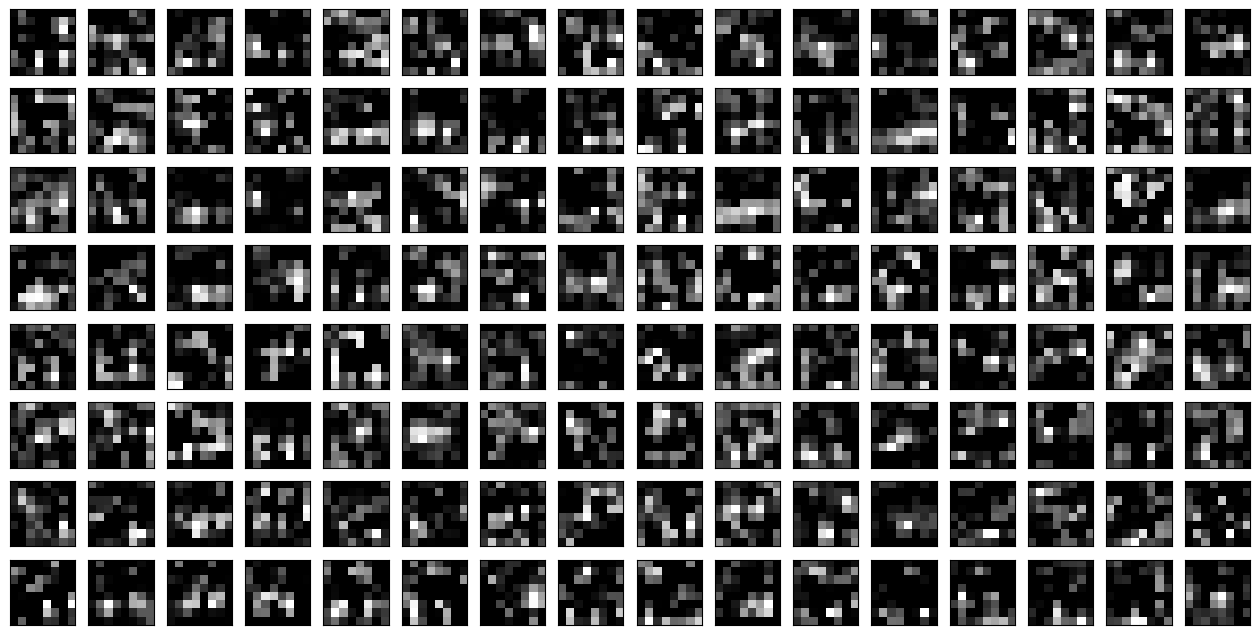

In [ ]:
print("세 번째 Feature Map 크기 : {}".format(feature_map3.shape))
plt.figure(figsize=(16,8))
for idx in range(128):
    plt.subplot(8,16,idx+1, xticks=[], yticks=[])
    plt.imshow(feature_map3[0,idx,...], cmap="gray")
plt.show()

In [ ]:
def summarize_feature_map(feature_map):

  summed_map = feature_map.abs().sum(dim=1)
  print("종합된 Feature Map의 크기 : {}".format(summed_map.shape))

  return summed_map

종합된 Feature Map의 크기 : torch.Size([1, 32, 32])


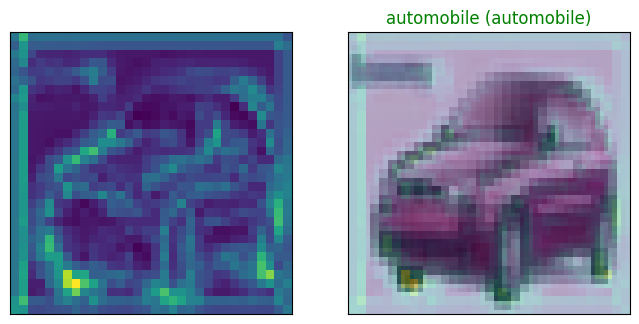

In [ ]:
summed_map = summarize_feature_map(feature_map1)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1, xticks=[], yticks=[])
plt.imshow(summed_map[0,...])

plt.subplot(1,2,2, xticks=[], yticks=[])
plt.imshow(x_batch[0,...].permute(1,2,0))
plt.imshow(summed_map[0,...], extent=[0,32,32,0], alpha=0.4)

pred_class = test_DS.classes[pred]
true_class = test_DS.classes[y_batch]
plt.title(f"{pred_class} ({true_class})", color="g" if pred_class==true_class else "r")
plt.show()

종합된 Feature Map의 크기 : torch.Size([1, 16, 16])


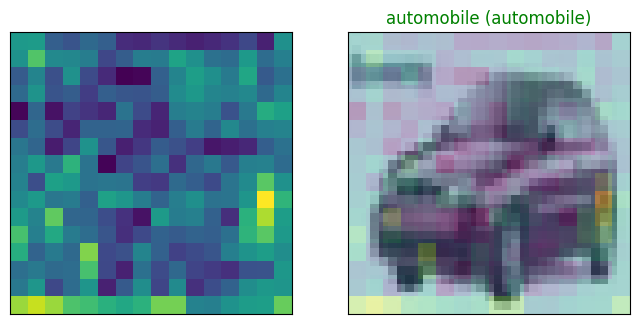

In [ ]:
summed_map = summarize_feature_map(feature_map2)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1, xticks=[], yticks=[])
plt.imshow(summed_map[0,...])

plt.subplot(1,2,2, xticks=[], yticks=[])
plt.imshow(x_batch[0,...].permute(1,2,0))
plt.imshow(summed_map[0,...], extent=[0,32,32,0], alpha=0.4)

pred_class = test_DS.classes[pred]
true_class = test_DS.classes[y_batch]
plt.title(f"{pred_class} ({true_class})", color="g" if pred_class==true_class else "r")
plt.show()

종합된 Feature Map의 크기 : torch.Size([1, 8, 8])


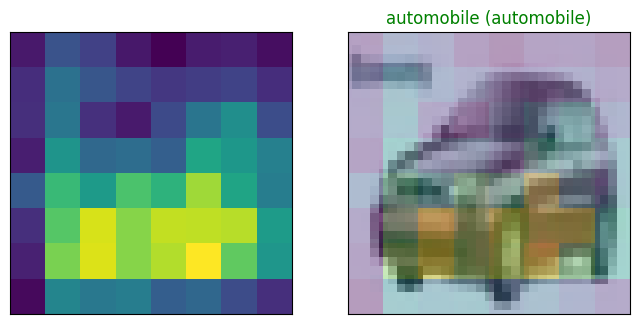

In [ ]:
summed_map = summarize_feature_map(feature_map3)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1, xticks=[], yticks=[])
plt.imshow(summed_map[0,...])

plt.subplot(1,2,2, xticks=[], yticks=[])
plt.imshow(x_batch[0,...].permute(1,2,0))
plt.imshow(summed_map[0,...], extent=[0,32,32,0], alpha=0.4)

pred_class = test_DS.classes[pred]
true_class = test_DS.classes[y_batch]
plt.title(f"{pred_class} ({true_class})", color="g" if pred_class==true_class else "r")
plt.show()

# 이미지넷 VGG19 모델 불러오기

In [ ]:
from torchvision import models

# 1000개의 ImageNet Classification을 하도록 훈련된 VGG19 모델 로딩
load_model = models.vgg19(weights="IMAGENET1K_V1")
print(load_model)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 78.0MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# 이미지 크기를 조절하기 위한 Transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(224,224)), # size는 (height,width)
    # transforms.CenterCrop(size=(224,224)), # size 는 (height, width)
    ])

In [ ]:
CLASS_FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/DL/CNN/data/imagenet1000_clsidx_to_labels.txt"
with open(CLASS_FILE_PATH) as f:
    idx2label = eval(f.read()) # dictionary로 바꿀 수 있게 eval 사용해서 str -> dict 로
print(idx2label)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

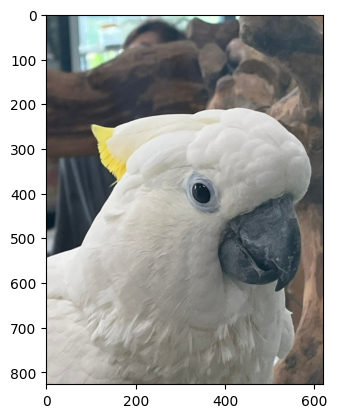

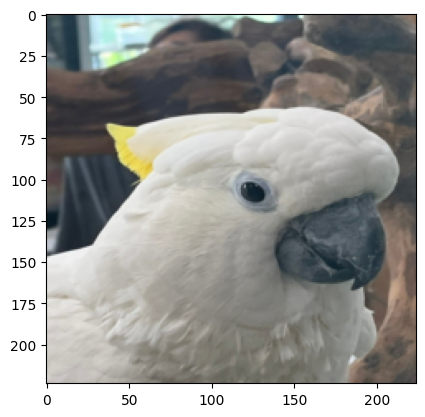

In [ ]:
X = plt.imread("/content/drive/MyDrive/Colab Notebooks/DL/CNN/data/cockatoo.jpg")

# 224 x 224 변환 전 시각화
plt.imshow(X)
plt.show()

# 224 x 224 변환 후 시각화
X=transform(X)
plt.imshow(X.permute(1,2,0))

plt.show()

In [ ]:
import torch.nn.functional as F

X = X.unsqueeze(dim=0)
print(X.shape)

load_model.eval()
with torch.no_grad():
    y_hat_sorted = load_model(X).sort(descending=True)
    percent_top5 = F.softmax(y_hat_sorted[0], dim=1)[0,:5]*100
    # print(percent_top5)
    pred_top5 = y_hat_sorted[1][0,:5] # sort 하고나서 [1]에 index가 담겨있음
    # print(pred_top5)
for i, idx in enumerate(pred_top5):
    print(idx2label[idx.item()],end="")
    print(f" ({round(percent_top5[i].item(),1)} %)")

torch.Size([1, 3, 224, 224])
plastic bag (77.2 %)
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita (12.5 %)
toilet tissue, toilet paper, bathroom tissue (3.1 %)
ptarmigan (2.8 %)
paper towel (1.9 %)


torch.Size([1, 512, 7, 7])
torch.Size([1, 512, 7, 7])


Text(0.5, 1.0, 'plastic bag')

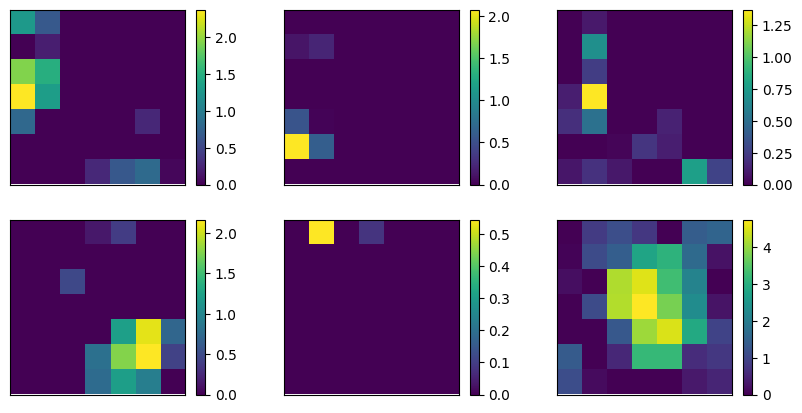

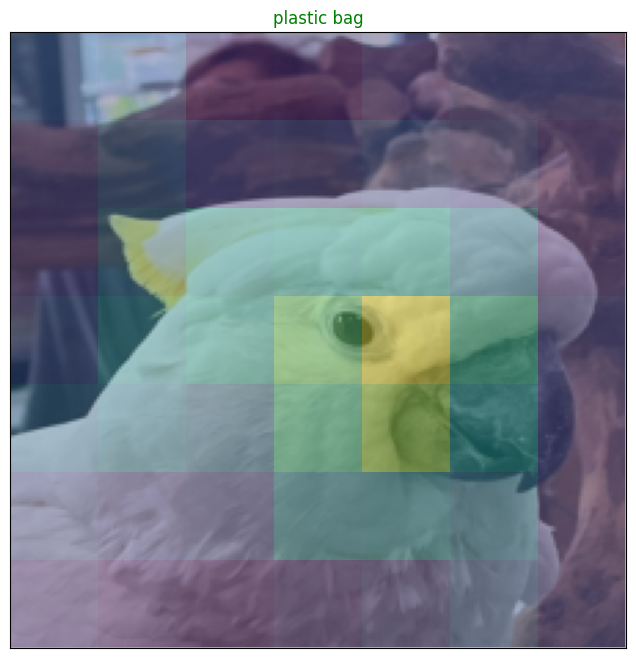

In [ ]:
load_model.eval()
with torch.no_grad():
    X_feature = load_model.features(X)
    print(X_feature.shape)
    X_feature = load_model.avgpool(X_feature).cpu()
    print(X_feature.shape)

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1, xticks=[], yticks=[])
    plt.imshow(X_feature[0,i,:,:])
    plt.colorbar()

summed_map = X_feature.sum(dim=1)
plt.figure(figsize=(8,8))
plt.xticks([]); plt.yticks([])
plt.imshow(X[0,...].cpu().permute(1,2,0))
plt.imshow(summed_map[0,...], extent=[0,224,224,0], alpha=0.4)
pred_class = idx2label[pred_top5[0].item()]
plt.title(pred_class, color="g")